<a href="https://colab.research.google.com/github/t-mayank/FMML_Lab/blob/main/FMML_M1L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
no0 = train_X[train_y == 0, :, :]
no1 = train_X[train_y == 1, :, :]
no2 = train_X[train_y == 2, :, :]
no8 = train_X[train_y == 8, :, :]
no4 = train_X[train_y == 4, :, :]

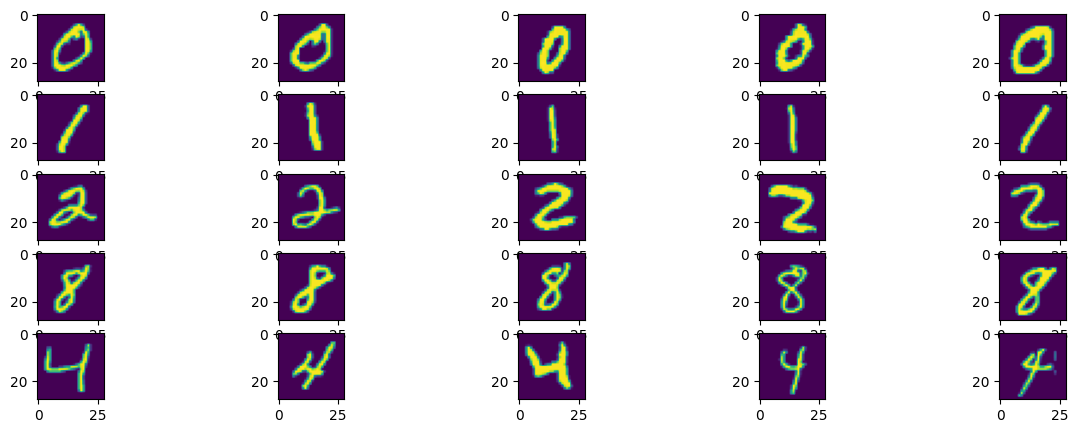

In [4]:
fig, axs = plt.subplots(5, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])
for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])
for ii in range(5):
    axs[2, ii].imshow(no2[ii, :, :])
for ii in range(5):
    axs[3, ii].imshow(no8[ii, :, :])
for ii in range(5):
    axs[4, ii].imshow(no4[ii, :, :])
plt.show()

In [5]:
sum0 = np.sum(no0 > 0, (1, 2))
sum1 = np.sum(no1 > 0, (1, 2))
sum2 = np.sum(no2 > 0, (1, 2))
sum8 = np.sum(no8 > 0, (1, 2))
sum4 = np.sum(no4 > 0, (1, 2))

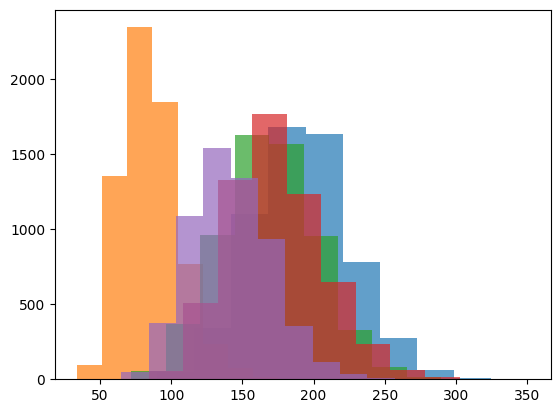

In [6]:
plt.hist(sum0, alpha=0.7)
plt.hist(sum1, alpha=0.7)
plt.hist(sum2, alpha=0.7)
plt.hist(sum8, alpha=0.7)
plt.hist(sum4, alpha=0.7)
plt.show()

In [7]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2

In [8]:
def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

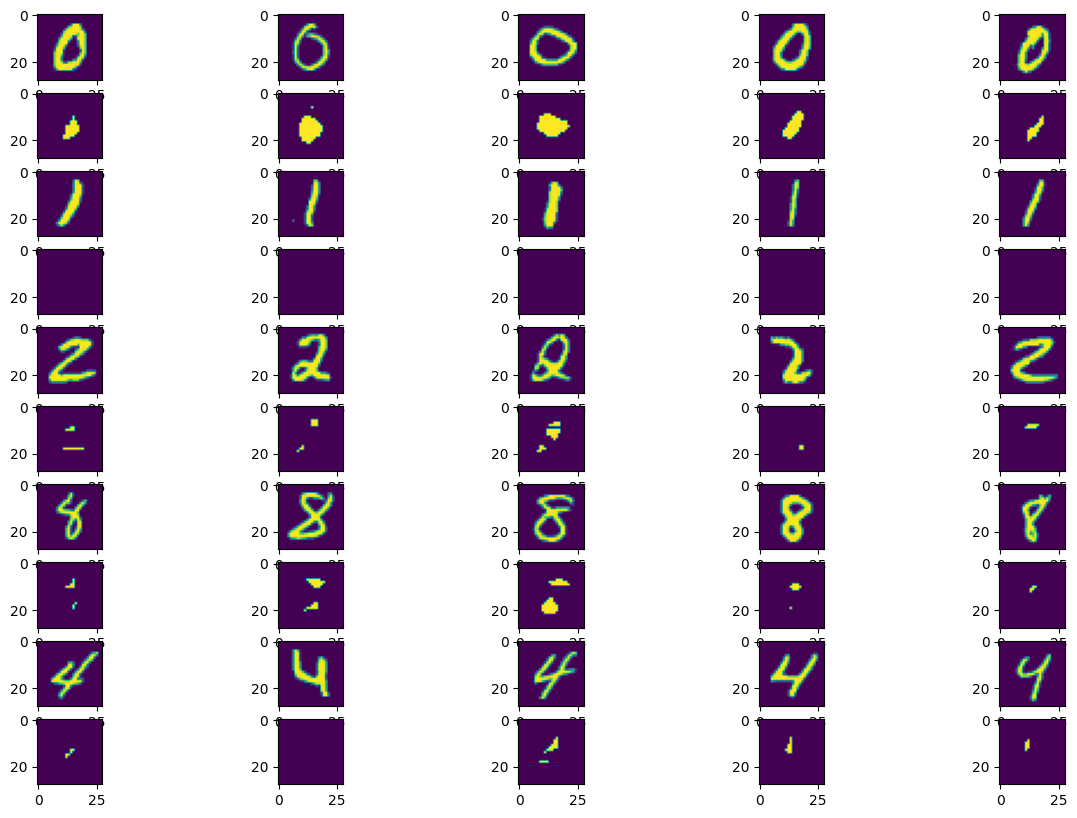

In [9]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(10, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))
    axs[4, ii].imshow(no2[idx, :, :])
    axs[5, ii].imshow(getHolePixels(no2[idx, :, :]))
    axs[6, ii].imshow(no8[idx, :, :])
    axs[7, ii].imshow(getHolePixels(no8[idx, :, :]))
    axs[8, ii].imshow(no4[idx, :, :])
    axs[9, ii].imshow(getHolePixels(no4[idx, :, :]))
plt.show()

(array([2665., 1800.,  807.,  332.,  126.,   64.,   29.,    8.,    6.,
           5.]),
 array([ 0. ,  5.8, 11.6, 17.4, 23.2, 29. , 34.8, 40.6, 46.4, 52.2, 58. ]),
 <BarContainer object of 10 artists>)

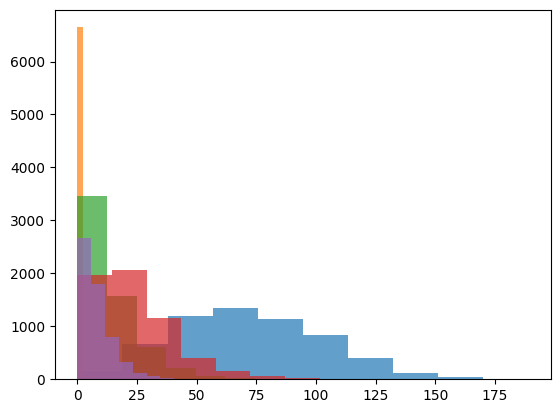

In [10]:
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole8 = np.array([getHolePixels(i).sum() for i in no8])
hole4 = np.array([getHolePixels(i).sum() for i in no4])
plt.hist(hole0, alpha=0.7)
plt.hist(hole1, alpha=0.7)
plt.hist(hole2, alpha=0.7)
plt.hist(hole8, alpha=0.7)
plt.hist(hole4, alpha=0.7)

In [11]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

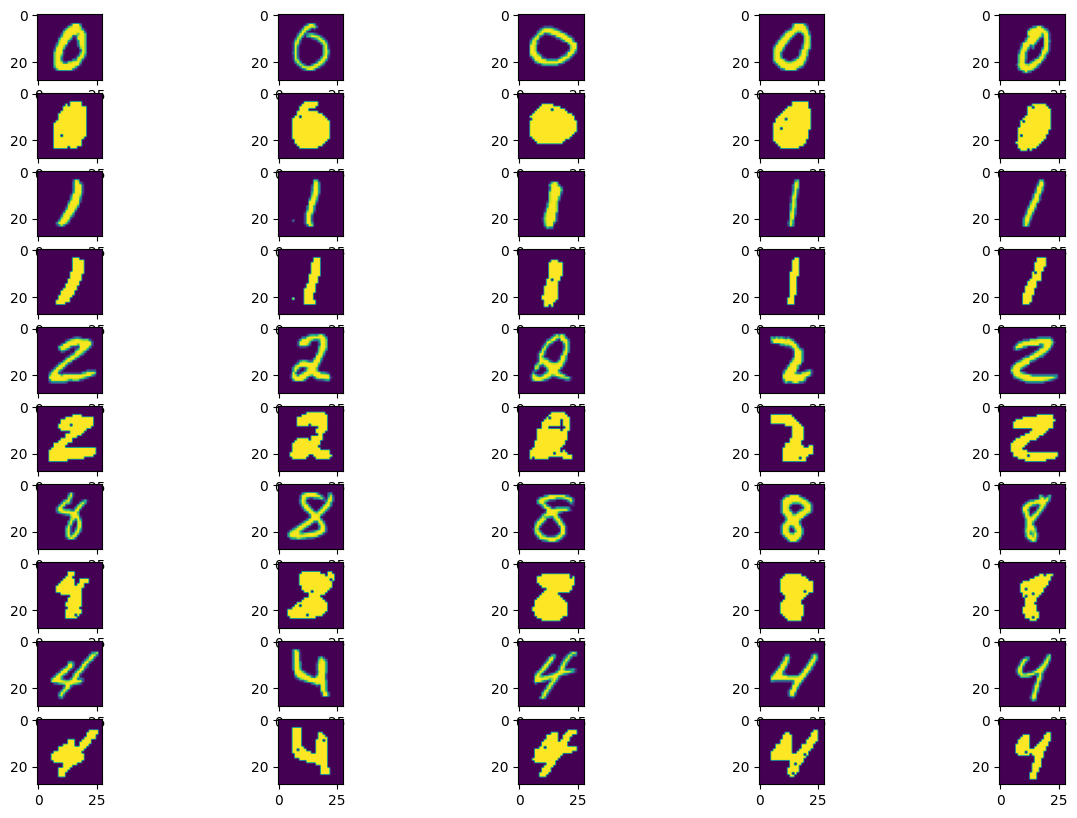

In [12]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(10, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))
    axs[4, ii].imshow(no2[idx, :, :])
    axs[5, ii].imshow(getHullPixels(no2[idx, :, :]))
    axs[6, ii].imshow(no8[idx, :, :])
    axs[7, ii].imshow(getHullPixels(no8[idx, :, :]))
    axs[8, ii].imshow(no4[idx, :, :])
    axs[9, ii].imshow(getHullPixels(no4[idx, :, :]))

(array([5.800e+01, 5.350e+02, 1.439e+03, 1.687e+03, 1.286e+03, 6.120e+02,
        1.830e+02, 3.600e+01, 5.000e+00, 1.000e+00]),
 array([ 66. ,  88.8, 111.6, 134.4, 157.2, 180. , 202.8, 225.6, 248.4,
        271.2, 294. ]),
 <BarContainer object of 10 artists>)

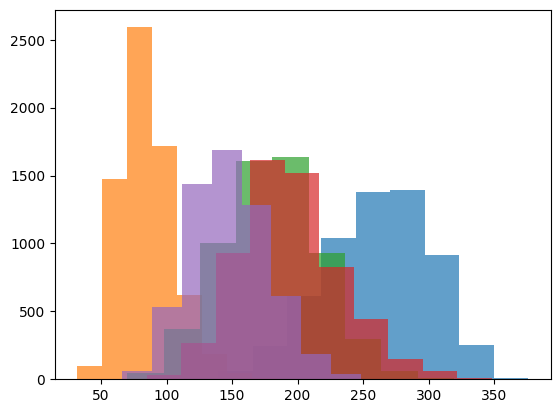

In [13]:
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull8 = np.array([getHullPixels(i).sum() for i in no8])
hull4 = np.array([getHullPixels(i).sum() for i in no4])

plt.hist(hull0, alpha=0.7)
plt.hist(hull1, alpha=0.7)
plt.hist(hull2, alpha=0.7)
plt.hist(hull8, alpha=0.7)
plt.hist(hull4, alpha=0.7)

In [14]:
def minus(a, b):
    return a & ~b

In [15]:
def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

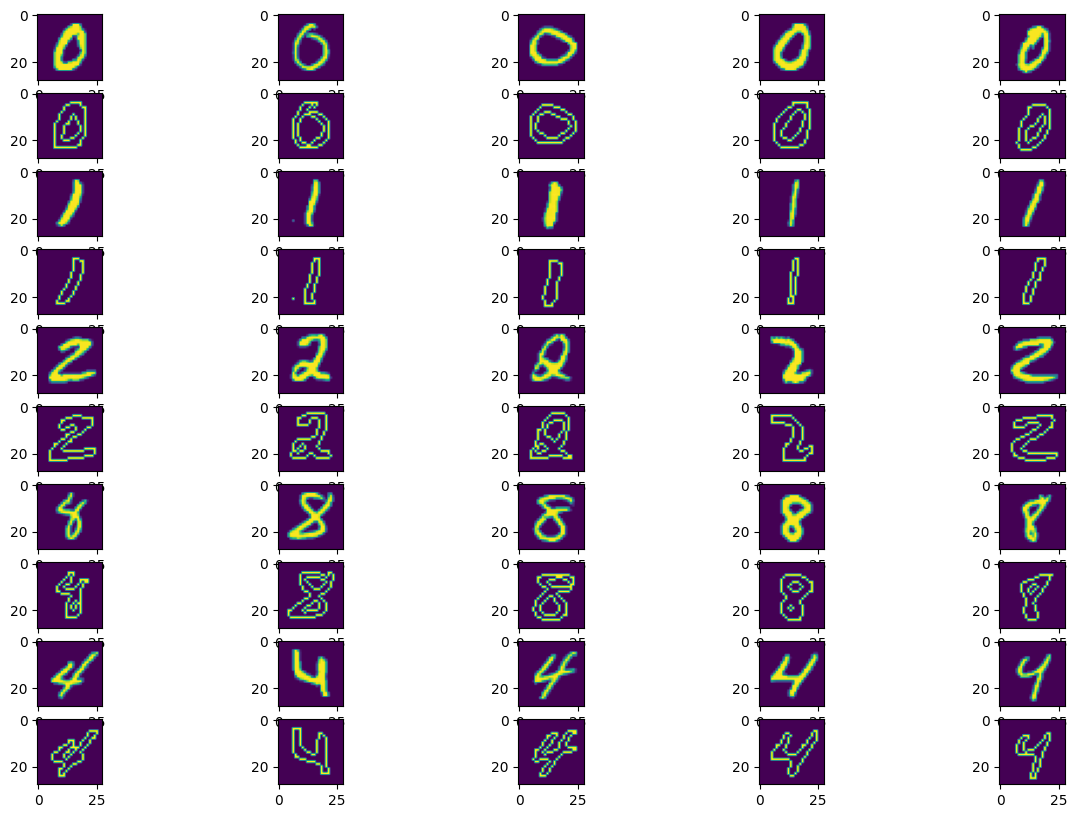

In [16]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(10, 5, figsize=(15, 10))
for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))
    axs[4, ii].imshow(no2[idx, :, :])
    axs[5, ii].imshow(getBoundaryPixels(no2[idx, :, :]))
    axs[6, ii].imshow(no8[idx, :, :])
    axs[7, ii].imshow(getBoundaryPixels(no8[idx, :, :]))
    axs[8, ii].imshow(no4[idx, :, :])
    axs[9, ii].imshow(getBoundaryPixels(no4[idx, :, :]))
plt.show()

(array([  19.,  108.,  516., 1384., 1532., 1419.,  650.,  183.,   29.,
           2.]),
 array([ 45. ,  50.8,  56.6,  62.4,  68.2,  74. ,  79.8,  85.6,  91.4,
         97.2, 103. ]),
 <BarContainer object of 10 artists>)

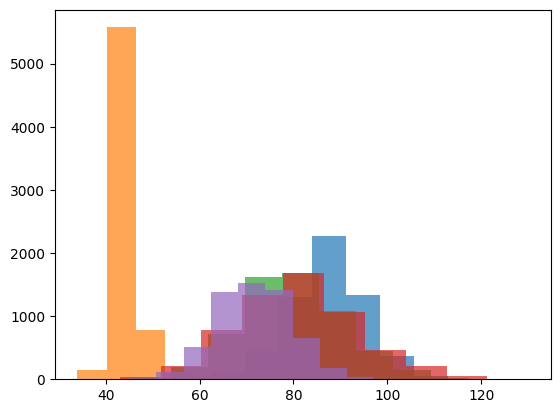

In [17]:
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound8 = np.array([getBoundaryPixels(i).sum() for i in no8])
bound4 = np.array([getBoundaryPixels(i).sum() for i in no4])

plt.hist(bound0, alpha=0.7)
plt.hist(bound1, alpha=0.7)
plt.hist(bound2, alpha=0.7)
plt.hist(bound8, alpha=0.7)
plt.hist(bound4, alpha=0.7)

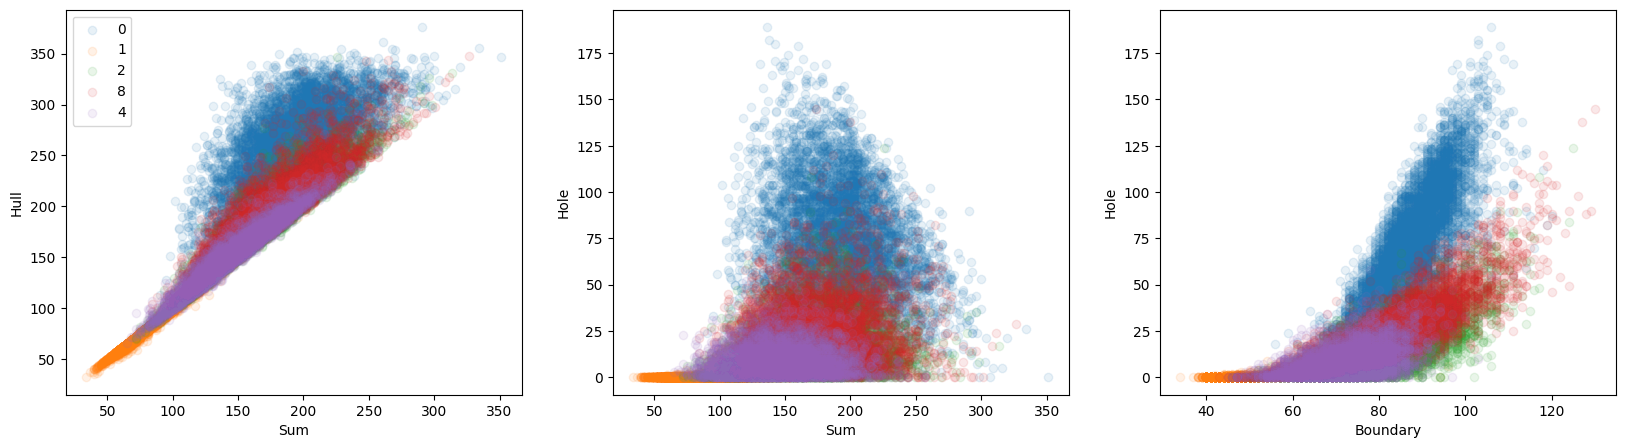

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].scatter(sum2, hull2, alpha=0.1)
axs[0].scatter(sum8, hull8, alpha=0.1)
axs[0].scatter(sum4, hull4, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1", "2", "8", "4"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].scatter(sum2, hole2, alpha=0.1)
axs[1].scatter(sum8, hole8, alpha=0.1)
axs[1].scatter(sum4, hole4, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[0].legend(["0", "1", "2", "8", "4"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].scatter(bound2, hole2, alpha=0.1)
axs[2].scatter(bound8, hole8, alpha=0.1)
axs[2].scatter(bound4, hole4, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[0].legend(["0", "1", "2", "8", "4"])
plt.show()

In [24]:
cl0 = ["class 0"] * len(sum0)
cl1 = ["class 1"] * len(sum1)
cl2 = ["class 2"] * len(sum2)
cl8 = ["class 8"] * len(sum8)
cl4 = ["class 4"] * len(sum4)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole1, hole2, hole8, hole4)),
            np.concatenate((sum0, sum1, sum2, sum8, sum4)),
            np.concatenate((bound0, bound1, bound2, bound8, bound4)),
            np.concatenate((cl0, cl1, cl2, cl8, cl4)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()